# Sensor Based Activity Recoginition 
Challenge: cdl1 - Sensor based Activity Recognition  
Team: Lea Bütler, Manjavy Kirupa, Etienne Roulet, Si Ben Tran  

Aufgabe: Visualisierungen der gemessenen Sensordaten

Hier in diesem Notebook visualisieren wir alle gemessenen Sensordaten und versuchen so zu identifizieren, welche aufgenommenen Sensordaten von relevanz sein können bzw. welche widerum nicht, indem wir die Visualisierungen uns anschauen und uns überlegen, ob wir diese Daten für die Klassifizierung brauchen oder nicht.

In [10]:
# Laden von Libraries
%pip install -r requirements.txt
from data_ingestion.pipeline_manager import PipelineRunner as PipelineRunner 
from data_ingestion import utilities as util
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt
import seaborn as snsb
import polars as pl
import pandas as pd

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Daten einlesen und Ausgeben 
path = "Messungen"
pipeline = None
origin = "SensorLogger"

runner = PipelineRunner(path)
runner.set_origin(origin)
runner.set_pipeline(pipeline)
data = runner.run()
path: pathlib.Path = "Export.arrow"
data.write_ipc(path)
data

Read Files:   0%|          | 0/299 [00:00<?, ?files/s]

time,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,Orientation_qx,Orientation_qy,Orientation_qz,id,user,class
datetime[ms],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str
2023-02-27 15:02:04.548,0.0,-3.552,-9.14,null,null,null,null,null,null,0.161765,-0.08829,-0.470671,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""
2023-02-27 15:02:17.156,0.0,9.722,1.278,null,null,null,null,null,null,-0.21775,-0.719579,0.631111,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""
2023-02-27 15:02:31.574,-0.728,9.779,0.0,null,null,null,null,null,null,-0.42065,0.568356,-0.598058,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""
2023-02-27 15:02:16.685,null,null,null,null,null,null,0.0,43.5,-13.14375,null,null,null,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""
2023-02-27 15:02:32.295,null,null,null,null,null,null,-13.012501,0.0,20.587502,null,null,null,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""
2023-02-27 15:02:33.285,null,null,null,null,null,null,-22.612501,0.0,20.268751,null,null,null,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""
2023-02-27 15:02:35.195,null,null,null,null,null,null,-12.1125,0.0,20.75625,null,null,null,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""
2023-02-27 15:02:45.315,null,null,null,null,null,null,-21.243752,0.0,16.9125,null,null,null,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""
2023-02-27 15:02:48.985,null,null,null,null,null,null,-41.100002,0.0,-3.24375,null,null,null,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""


In [38]:
# to avoid reading all the files from the disk again, we can read the data the exported csv file

# read “All_Messungen" and “All_Messungen_trimmed" as pandas dataframe
data_all = pd.read_csv("Alle_Messungen.csv")
data_all_trimmed = pd.read_csv("Alle_Messungen_trimmed.csv")

display('data_all: ', data_all.head())
display('data_all_trimmed: ', data_all_trimmed)


'data_all: '

,Unnamed: 0,time,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,Orientation_qx,Orientation_qy,Orientation_qz,id,user,class,id_combined
0,0,2023-02-27 15:02:04.548,0.000,-3.552,-9.140,NaN,NaN,NaN,NaN,NaN,NaN,0.161765,-0.088290,-0.470671,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
1,1,2023-02-27 15:02:17.156,0.000,9.722,1.278,NaN,NaN,NaN,NaN,NaN,NaN,-0.217750,-0.719579,0.631111,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
2,2,2023-02-27 15:02:31.574,-0.728,9.779,0.000,NaN,NaN,NaN,NaN,NaN,NaN,-0.420650,0.568356,-0.598058,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
3,3,2023-02-27 15:02:16.685,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,43.5,-13.143750,NaN,NaN,NaN,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
4,4,2023-02-27 15:02:32.295,NaN,NaN,NaN,NaN,NaN,NaN,-13.012501,0.0,20.587502,NaN,NaN,NaN,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen


'data_all_trimmed: '

,Unnamed: 0.1,Unnamed: 0,time,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,Orientation_qx,Orientation_qy,Orientation_qz,id,user,class,id_combined
0,1,1,2023-02-27 15:02:17.156,0.000000,9.722000,1.278000,NaN,NaN,NaN,NaN,NaN,NaN,-0.217750,-0.719579,0.631111,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
1,2,2,2023-02-27 15:02:31.574,-0.728000,9.779000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,-0.420650,0.568356,-0.598058,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
2,3,3,2023-02-27 15:02:16.685,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,43.500000,-13.143750,NaN,NaN,NaN,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
3,4,4,2023-02-27 15:02:32.295,NaN,NaN,NaN,NaN,NaN,NaN,-13.012501,0.000000,20.587502,NaN,NaN,NaN,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
4,5,5,2023-02-27 15:02:33.285,NaN,NaN,NaN,NaN,NaN,NaN,-22.612501,0.000000,20.268751,NaN,NaN,NaN,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275519,2460354,2460354,2023-03-11 13:11:56.901,2.507094,4.691251,-0.583939,0.246416,0.067954,0.365369,-4.043274,6.146469,44.221630,0.959304,-0.001751,0.282337,9_iphone13mini-2023-03-11_13-09-56,Weiping_Zhang,Velofahren,9_iphone13mini-2023-03-11_13-09-56Weiping_Zhan...
2275520,2460355,2460355,2023-03-11 13:11:56.911,1.888469,3.766656,-0.826295,0.196101,0.019053,0.352243,-3.925354,6.195618,44.229263,0.959236,-0.003181,0.282578,9_iphone13mini-2023-03-11_13-09-56,Weiping_Zhang,Velofahren,9_iphone13mini-2023-03-11_13-09-56Weiping_Zhan...
2275521,2460356,2460356,2023-03-11 13:11:56.921,0.994240,3.075035,-0.740944,0.105015,-0.027495,0.306060,-3.801758,6.023056,43.900330,0.959244,-0.004561,0.282538,9_iphone13mini-2023-03-11_13-09-56,Weiping_Zhang,Velofahren,9_iphone13mini-2023-03-11_13-09-56Weiping_Zhan...
2275522,2460357,2460357,2023-03-11 13:11:56.931,0.423654,2.433349,-0.432823,-0.027677,0.027132,0.250502,-3.830048,6.086670,43.879021,0.959245,-0.005843,0.282515,9_iphone13mini-2023-03-11_13-09-56,Weiping_Zhang,Velofahren,9_iphone13mini-2023-03-11_13-09-56Weiping_Zhan...


In [70]:
# function to get number of measurements per user and class
def get_n_obs(data):
    return pd.DataFrame(data.groupby(["id", "user", "class"]).first().groupby(["user", "class"]).count().sort_values(["user", "class"]).iloc[:, 0]).reset_index().rename(columns={"Unnamed: 0": "number of measurements total", 'Unnamed: 0.1': 'number of measurements trimmed'})

# get number of measurements per user and class before and after trimming
data_n_obs = get_n_obs(data_all)
data_n_obs_trimmed = get_n_obs(data_all_trimmed)

# combine data_n_obs and data_n_obs_trimmed
data_merged = data_n_obs.merge(data_n_obs_trimmed, on=['user', 'class'])

# melt data_merged
data_merged = data_merged.melt(id_vars=['user', 'class'], value_vars=['number of measurements total', 'number of measurements trimmed'], var_name='total_or_trimmed', value_name='number_of_measurements')

# display data_merged
display("Number of measurements per user and class", data_merged[data_merged['user'] == 'Ben_Tran'])

display(data_n_obs.head())


'Number of measurements per user and class'

,user,class,total_or_trimmed,number_of_measurements
0,Ben_Tran,Laufen,number of measurements total,8
1,Ben_Tran,Rennen,number of measurements total,11
2,Ben_Tran,Sitzen,number of measurements total,13
3,Ben_Tran,Stehen,number of measurements total,12
4,Ben_Tran,Treppenlaufen,number of measurements total,18
5,Ben_Tran,Velofahren,number of measurements total,12
47,Ben_Tran,Laufen,number of measurements trimmed,8
48,Ben_Tran,Rennen,number of measurements trimmed,11
49,Ben_Tran,Sitzen,number of measurements trimmed,13
50,Ben_Tran,Stehen,number of measurements trimmed,12


,user,class,number of measurements total
0,Ben_Tran,Laufen,8
1,Ben_Tran,Rennen,11
2,Ben_Tran,Sitzen,13
3,Ben_Tran,Stehen,12
4,Ben_Tran,Treppenlaufen,18


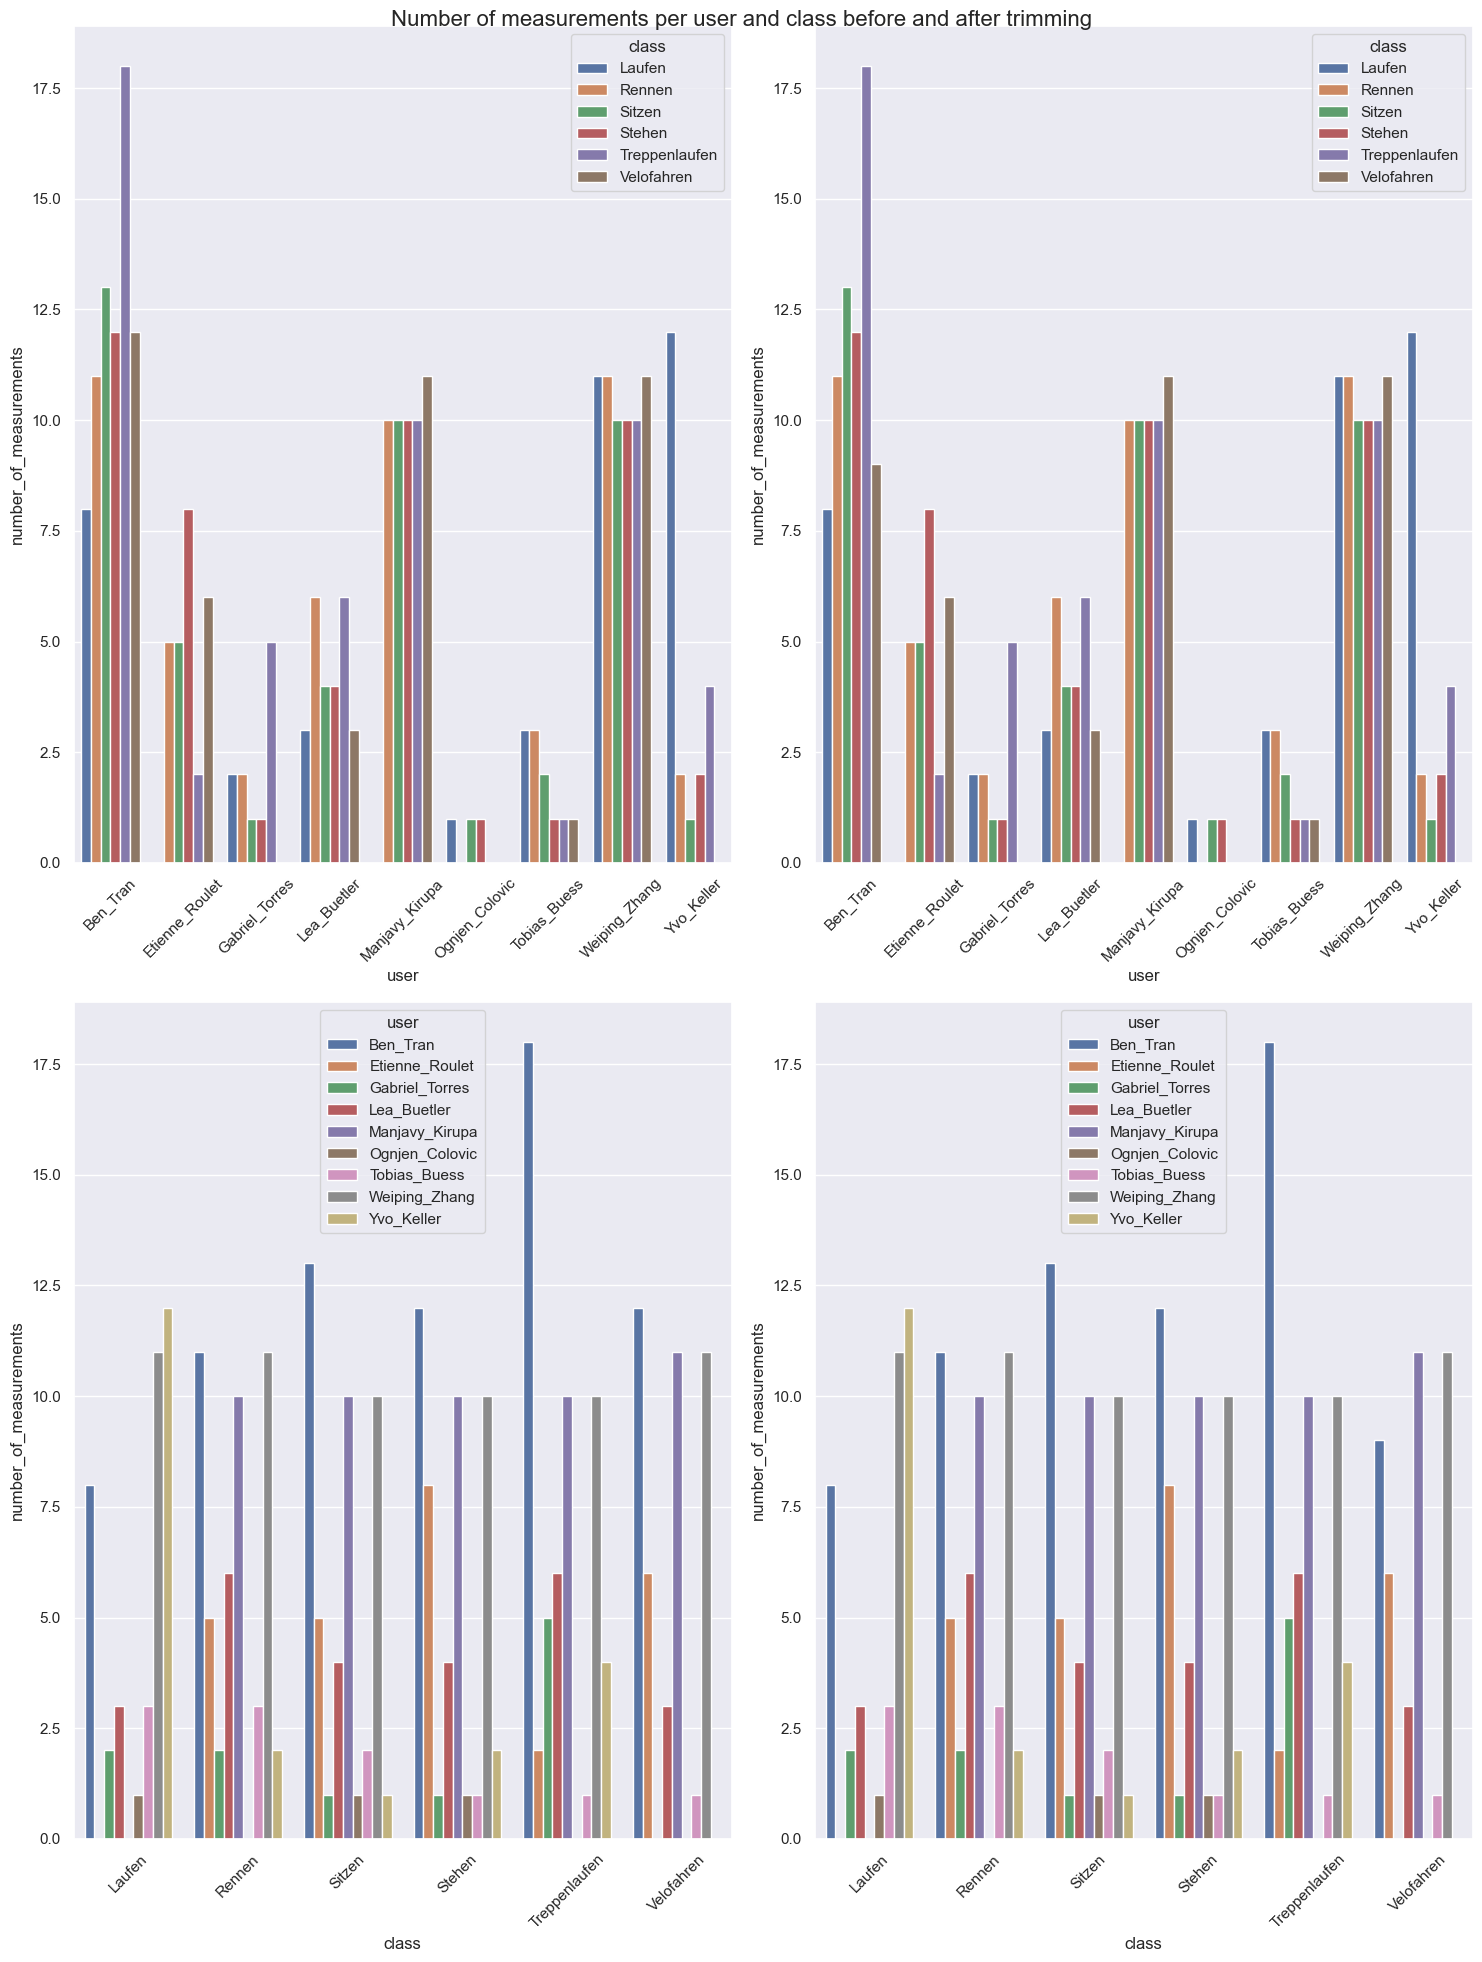

In [79]:
# plot number of measurements per user and class before and after trimming
fig, ax = plt.subplots(2, 2, figsize=(15, 20))
fig.suptitle('Number of measurements per user and class before and after trimming', fontsize=16)
snsb.barplot(x="user", y="number_of_measurements", hue="class", data=data_merged[data_merged['total_or_trimmed'] == 'number of measurements total'], ax=ax[0, 0])
snsb.barplot(x="user", y="number_of_measurements", hue="class", data=data_merged[data_merged['total_or_trimmed'] == 'number of measurements trimmed'], ax=ax[0, 1])
snsb.barplot(x="class", y="number_of_measurements", hue="user", data=data_merged[data_merged['total_or_trimmed'] == 'number of measurements total'], ax=ax[1, 0])
snsb.barplot(x="class", y="number_of_measurements", hue="user", data=data_merged[data_merged['total_or_trimmed'] == 'number of measurements trimmed'], ax=ax[1, 1])
#rotate xticks
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

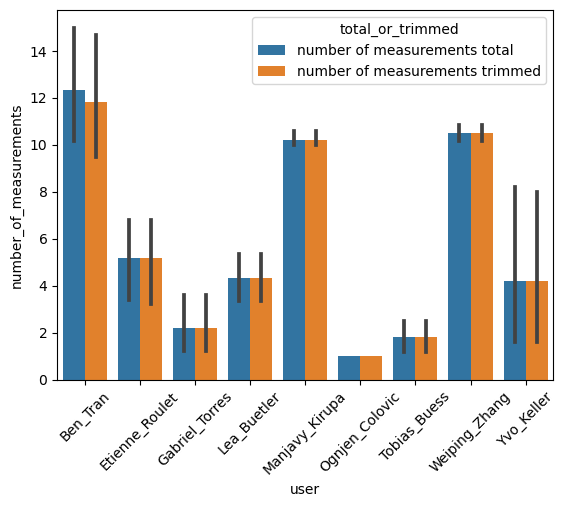

In [67]:
# barplot of number of measurements per user before and after trimming
snsb.barplot(x='user', y='number_of_measurements', hue='total_or_trimmed', data=data_merged)
# rotate x-axis labels
plt.xticks(rotation=45)
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

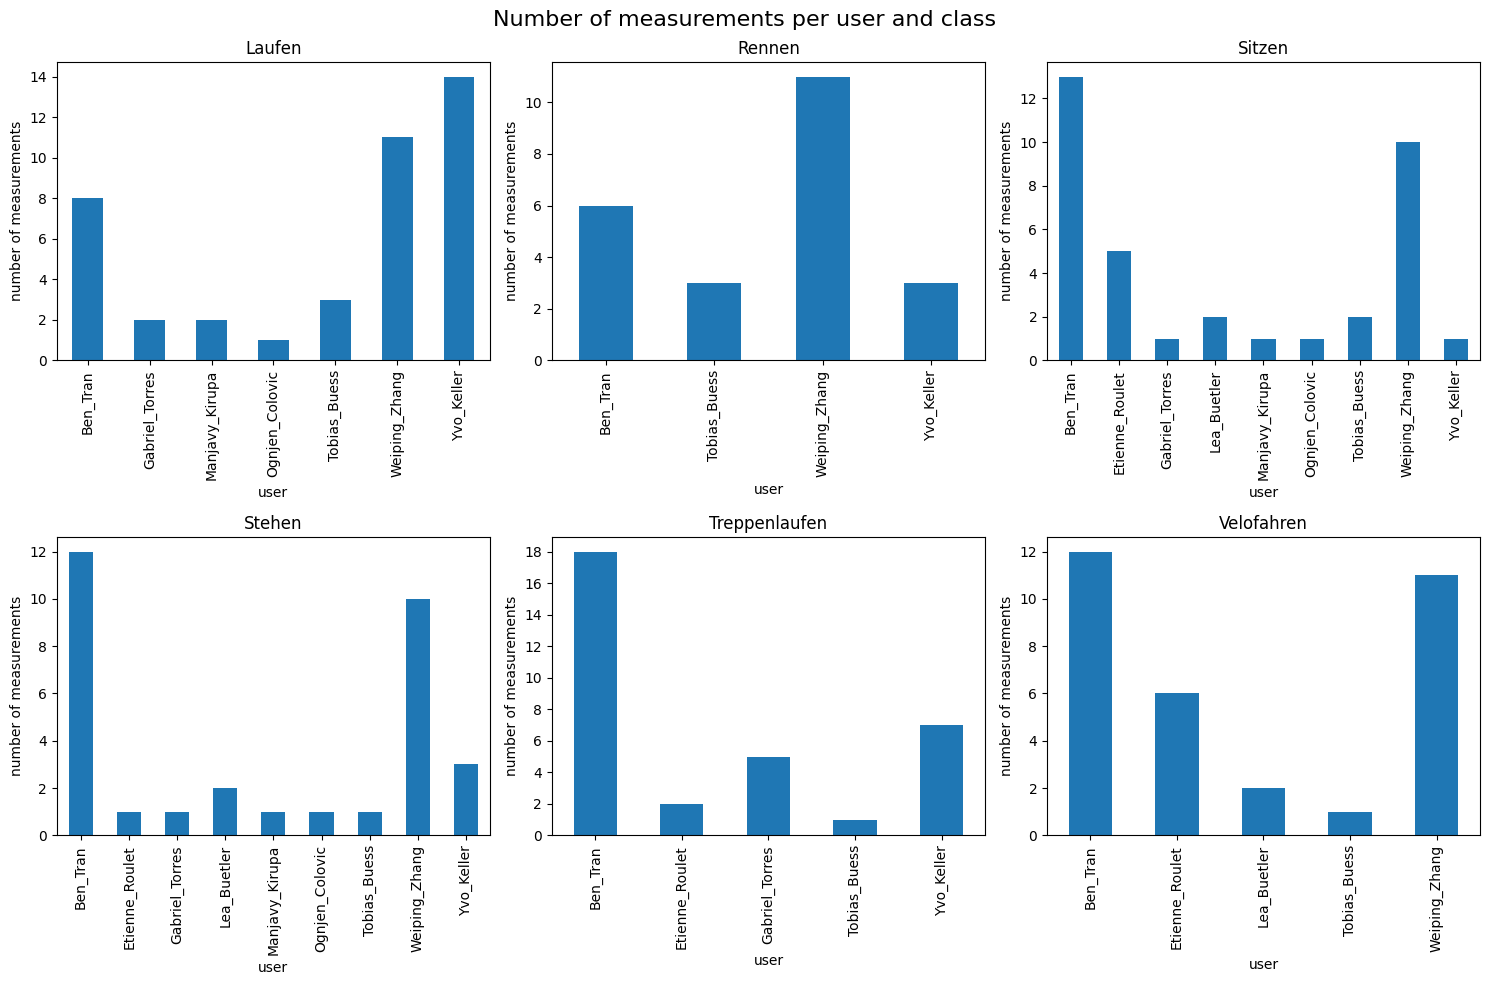

In [22]:
# create 6 subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
# create for each class in data_n_obs a barplot with user on x-axis and number of measurements on y-axis
for i, class_ in enumerate(data_n_obs_pd["class"].unique()):
    data_n_obs_pd[data_n_obs_pd["class"] == class_].plot.bar(x="user", y="number of measurements", ax=axs[i//3, i%3], title=class_)
    axs[i//3, i%3].set_ylabel("number of measurements")
    axs[i//3, i%3].set_xlabel("user")
    axs[i//3, i%3].yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    fig.suptitle("Number of measurements per user and class", fontsize=16)
    axs[i//3, i%3].legend().set_visible(False)
    plt.tight_layout()
plt.show()

In diesen 6 Plots erkennen wir die Verteilungen unserer Daten, die wir gruppenuebergreifend aufgenommen haben.

## Aufteilung des DataFrames in Bewegungsprofilen

In [4]:
data_laufen = data.filter(pl.col("class") == "Laufen")

data_sitzen = data.filter(pl.col("class") == "Sitzen")

data_stehen = data.filter(pl.col("class") == "Stehen")

data_rennen = data.filter(pl.col("class") == "Rennen")

data_treppensteigen = data.filter(pl.col("class") == "Treppenlaufen")

data_velofahren = data.filter(pl.col("class") == "Velofahren")

In [5]:
data_laufen

time,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,Orientation_qx,Orientation_qy,Orientation_qz,id,user,class
datetime[ms],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str
2023-02-27 15:02:04.548,0.0,-3.552,-9.14,null,null,null,null,null,null,0.161765,-0.08829,-0.470671,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""
2023-02-27 15:02:17.156,0.0,9.722,1.278,null,null,null,null,null,null,-0.21775,-0.719579,0.631111,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""
2023-02-27 15:02:31.574,-0.728,9.779,0.0,null,null,null,null,null,null,-0.42065,0.568356,-0.598058,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""
2023-02-27 15:02:16.685,null,null,null,null,null,null,0.0,43.5,-13.14375,null,null,null,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""
2023-02-27 15:02:32.295,null,null,null,null,null,null,-13.012501,0.0,20.587502,null,null,null,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""
2023-02-27 15:02:33.285,null,null,null,null,null,null,-22.612501,0.0,20.268751,null,null,null,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""
2023-02-27 15:02:35.195,null,null,null,null,null,null,-12.1125,0.0,20.75625,null,null,null,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""
2023-02-27 15:02:45.315,null,null,null,null,null,null,-21.243752,0.0,16.9125,null,null,null,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""
2023-02-27 15:02:48.985,null,null,null,null,null,null,-41.100002,0.0,-3.24375,null,null,null,"""01_SamsungA22-...","""Ben_Tran""","""Laufen"""


## Bwegungsprofil: Laufen

## Bewegungsprofil: Sitzen

## Bewegungsprofil: Stehen

## Bewegungsprofil: Rennen

## Bewegungsprofil: Treppensteigen

## Bewegungsprofil: Velofahren